# 

- **Questions**: [Here](../data/homework_1/HW1.pdf)
- **Answer Set** : NO. 01
- **Full Name** : Fatemeh Karimi Barikarasfi
- **Student Code** : 610301060


## Importing Needed Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.exposure import match_histograms

## 1.

### Loading the image

load the image1 in colored form:

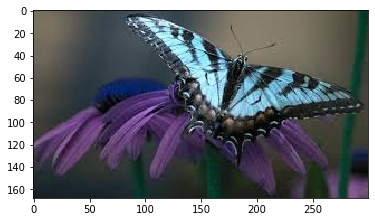

In [2]:
img1 = cv2.imread('image1.jpg')
plt.imshow(img1)

size of the image1:

In [3]:
img1.shape

(168, 300, 3)

In [4]:
img1.dtype

dtype('uint8')

Load the image1 in gray form

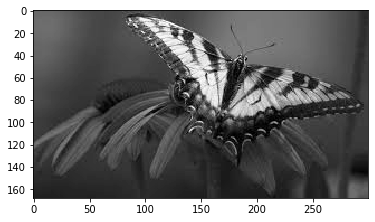

In [5]:
img1_gray = cv2.imread('image1.jpg', 0)
plt.imshow(img1_gray, cmap='gray')

### Computing the difference between values in neighboring pixels.

using two different kernel for this goal

In [6]:
kernel = np.array([[0, 1, 0], [1, -2, 0], [0, 0, 0]], np.float32)
diff = cv2.filter2D(img1_gray, -1, kernel)

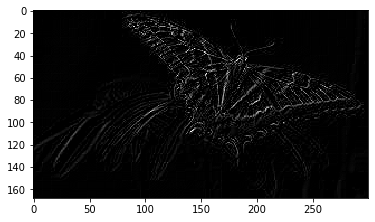

In [7]:
plt.imshow(diff, cmap='gray')

In [8]:
kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]], np.float32)
diff = cv2.filter2D(img1_gray, -1, kernel)

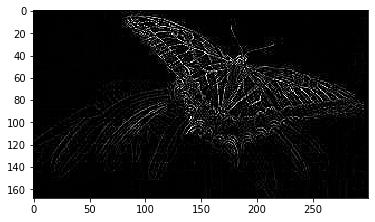

In [9]:
plt.imshow(diff, cmap='gray')

### 8bit-plane slicing:

In [10]:
img = cv2.imread('image1.jpg',0)

x, y = img.shape
lst = []
for i in range(x):
    for j in range(y):
         lst.append(np.binary_repr(img[i][j] ,width=8))

            
img_bit8 = (np.array([int(i[0]) for i in lst],dtype = np.uint8) * 128).reshape(x, y)
img_bit7 = (np.array([int(i[1]) for i in lst],dtype = np.uint8) * 64).reshape(x, y)
img_bit6 = (np.array([int(i[2]) for i in lst],dtype = np.uint8) * 32).reshape(x, y)
img_bit5 = (np.array([int(i[3]) for i in lst],dtype = np.uint8) * 16).reshape(x, y)
img_bit4 = (np.array([int(i[4]) for i in lst],dtype = np.uint8) * 8).reshape(x, y)
img_bit3 = (np.array([int(i[5]) for i in lst],dtype = np.uint8) * 4).reshape(x, y)
img_bit2 = (np.array([int(i[6]) for i in lst],dtype = np.uint8) * 2).reshape(x, y)
img_bit1 = (np.array([int(i[7]) for i in lst],dtype = np.uint8) * 1).reshape(x, y)


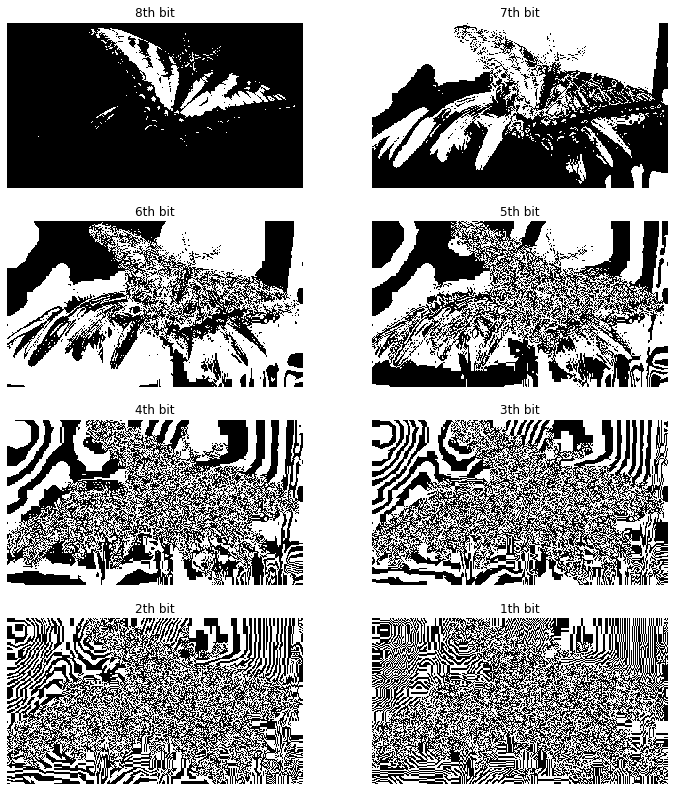

In [11]:
plt.figure(figsize=(12, 14))

plt.subplot(4, 2, 1)
plt.title('8th bit')
plt.imshow(img_bit8, cmap='gray')
plt.axis('off')

plt.subplot(4, 2, 2)
plt.title('7th bit')
plt.imshow(img_bit7, cmap='gray')
plt.axis('off')

plt.subplot(4, 2, 3)
plt.title('6th bit')
plt.imshow(img_bit6, cmap='gray')
plt.axis('off')

plt.subplot(4, 2, 4)
plt.title('5th bit')
plt.imshow(img_bit5, cmap='gray')
plt.axis('off')

plt.subplot(4, 2, 5)
plt.title('4th bit')
plt.imshow(img_bit4, cmap='gray')
plt.axis('off')

plt.subplot(4, 2, 6)
plt.title('3th bit')
plt.imshow(img_bit3, cmap='gray')
plt.axis('off')

plt.subplot(4, 2, 7)
plt.title('2th bit')
plt.imshow(img_bit2, cmap='gray')
plt.axis('off')

plt.subplot(4, 2, 8)
plt.title('1th bit')
plt.imshow(img_bit1, cmap='gray')
plt.axis('off')

plt.show()

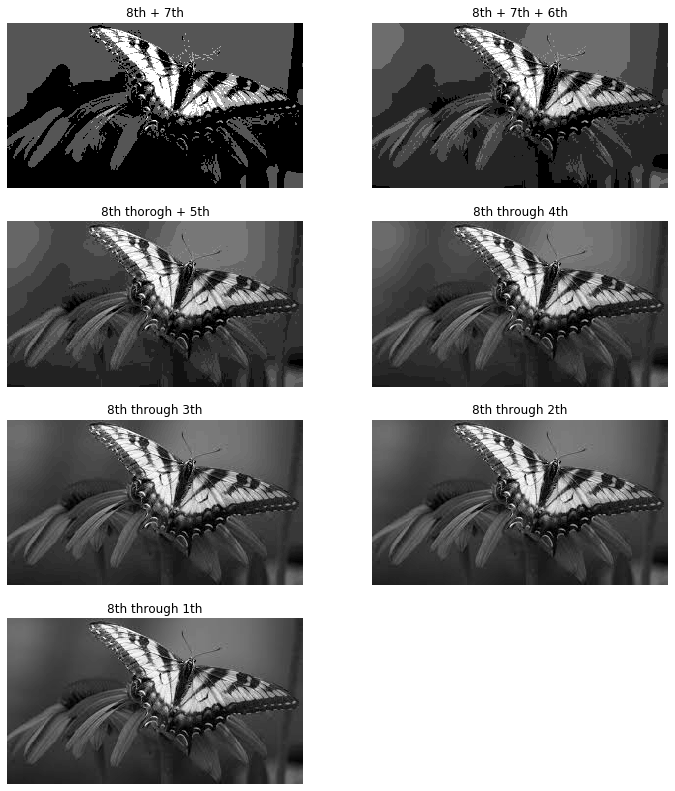

In [12]:
plt.figure(figsize=(12, 14))
plt.subplot(4, 2, 1)
plt.title('8th + 7th')
plt.imshow(img_bit8 + img_bit7, cmap='gray')
plt.axis('off')

plt.subplot(4, 2, 2)
plt.title('8th + 7th + 6th')
plt.imshow(img_bit8 + img_bit7 + img_bit6, cmap='gray')
plt.axis('off')

plt.subplot(4, 2, 3)
plt.title('8th thorogh + 5th')
plt.imshow(img_bit8 + img_bit7 + img_bit6 + img_bit5, cmap='gray')
plt.axis('off')

plt.subplot(4, 2, 4)
plt.title('8th through 4th')
plt.imshow(img_bit8 + img_bit7 + img_bit6 + img_bit5 + img_bit4, cmap='gray')
plt.axis('off')

plt.subplot(4, 2, 5)
plt.title('8th through 3th')
plt.imshow(img_bit8 + img_bit7 + img_bit6 + img_bit5 + img_bit4 + img_bit3, cmap='gray')
plt.axis('off')

plt.subplot(4, 2, 6)
plt.title('8th through 2th')
plt.imshow(img_bit8 + img_bit7 + img_bit6 + img_bit5 + img_bit4 + img_bit3 + img_bit2, cmap='gray')
plt.axis('off')

plt.subplot(4, 2, 7)
plt.title('8th through 1th')
plt.imshow(img_bit8 + img_bit7 + img_bit6 + img_bit5 + img_bit4 + img_bit3 + img_bit2 + img_bit1, cmap='gray')
plt.axis('off')

plt.show()

## 2.

### geometrical spatial 

real image:

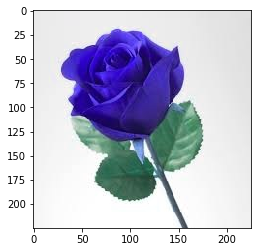

In [13]:
img2 = cv2.imread('image2.jpg')
plt.imshow(img2)

In [14]:
img2.shape

(225, 225, 3)

Scaled image (1.5, 1.5) :

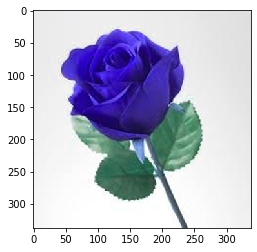

In [15]:
# scalling
rescalled_img2 = cv2.resize(img2, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_CUBIC)
plt.imshow(rescalled_img2)

In [16]:
rescalled_img2.shape

(338, 338, 3)

Translated image:

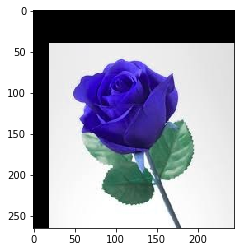

In [17]:
# Translation
rows, cols, depth = img2.shape
T = np.float32([[1, 0 , 20], [0, 1, 40]])
translated_img2 = cv2.warpAffine(img2, T, (cols + 20, rows + 40))
plt.imshow(translated_img2)

Rotated image:

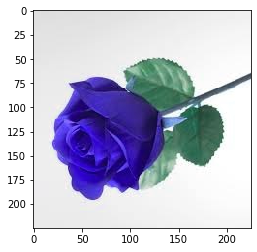

In [18]:
# Rotation
R = cv2.getRotationMatrix2D(((cols - 1)/2.0, (rows - 1)/2.0), 90, 1)
rotated_img2 = cv2.warpAffine(img2, R, (rows, cols))
plt.imshow(rotated_img2)

## 3.

### Histogram Equalization in BGR color space

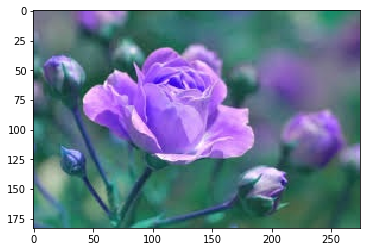

In [19]:
img3 = cv2.imread('image3.jpg')
plt.imshow(img3, cmap='gray')

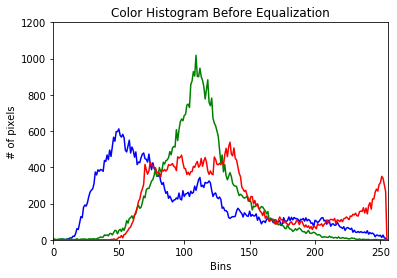

In [20]:
chans = cv2.split(img3)
colors = 'b', 'g', 'r'
plt.figure()
plt.title('Color Histogram Before Equalization')
plt.xlabel('Bins')
plt.ylabel('# of pixels')
for (chan, color) in zip(chans, colors):
    hist = cv2.calcHist([chan], [0], None, [256], [0, 255])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])
    plt.ylim([0, 1200])
plt.show()

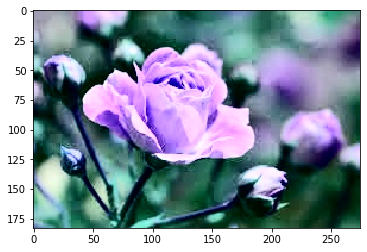

In [21]:
img3_yuv = cv2.cvtColor(img3, cv2.COLOR_BGR2YUV)
img3_yuv[:, :, 0] = cv2.equalizeHist(img3_yuv[:, :, 0])
img3_output = cv2.cvtColor(img3_yuv, cv2.COLOR_YUV2BGR)

plt.imshow(img3_output)

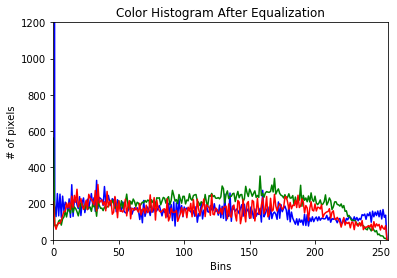

In [22]:
chans = cv2.split(img3_output)
colors = 'b', 'g', 'r'
plt.figure()
plt.title('Color Histogram After Equalization')
plt.xlabel('Bins')
plt.ylabel('# of pixels')
for (chan, color) in zip(chans, colors):
    hist = cv2.calcHist([chan], [0], None, [256], [0, 255])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])
    plt.ylim([0, 1200])
plt.show()

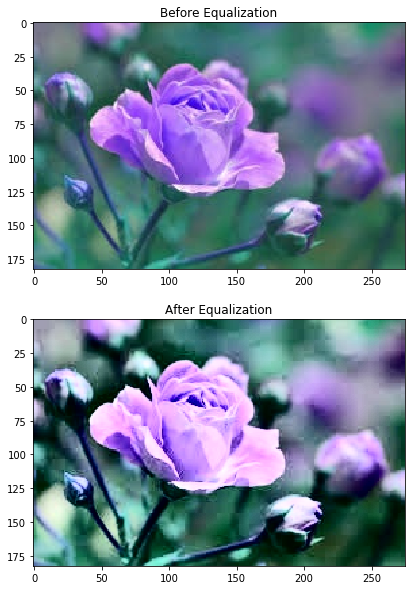

In [23]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.title('Before Equalization')
plt.imshow(img3)

plt.subplot(2, 1, 2)
plt.title('After Equalization')
plt.imshow(img3_output, cmap='gray')

plt.show()

### Histogram Equalization in Gray color space

In [24]:
img3_gray = cv2.imread('image3.jpg', 0)
equ = cv2.equalizeHist(img3_gray)

In [25]:
img3_gray.shape

(183, 275)

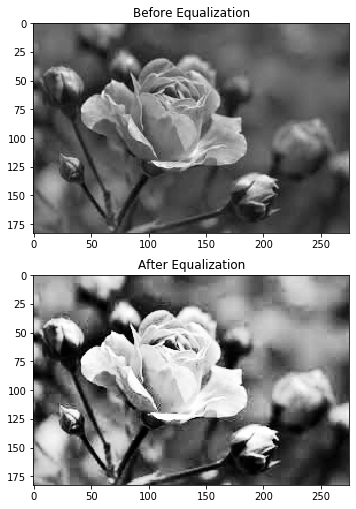

In [26]:
plt.figure(figsize=(8.5, 8.5))
plt.subplot(2, 1, 1)
plt.title('Before Equalization')
plt.imshow(img3_gray, cmap='gray')

plt.subplot(2, 1, 2)
plt.title('After Equalization')
plt.imshow(equ, cmap='gray')

plt.show()

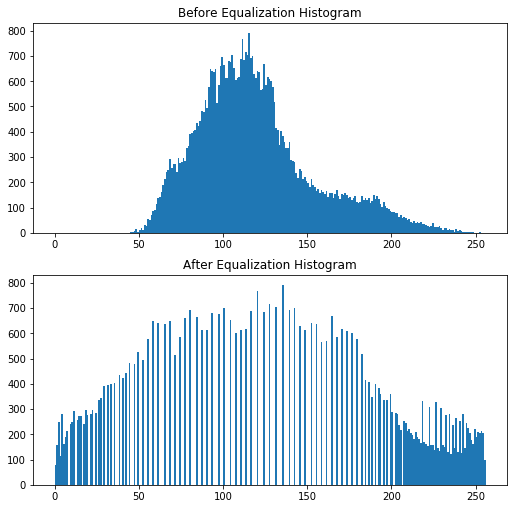

In [27]:
plt.figure(figsize=(8.5, 8.5))
plt.subplot(2, 1, 1)
plt.title('Before Equalization Histogram')
plt.hist(img3_gray.ravel(), 256, [0, 256])

plt.subplot(2, 1, 2)
plt.title('After Equalization Histogram')
plt.hist(equ.ravel(), 256, [0, 256])
plt.show()

### Histogram Matching with Gassian Distribution

Generate a random image with Gaussian distribution: 

In [28]:
mu = img3_gray.mean()
sigma = img3_gray.var() ** 0.5

ref_image = np.random.normal(mu, sigma, size=img3_gray.shape)

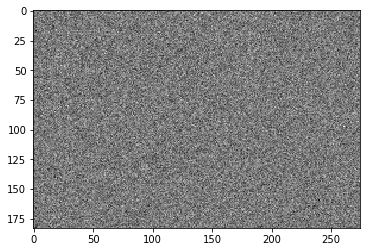

In [29]:
plt.imshow(ref_image, cmap='gray')

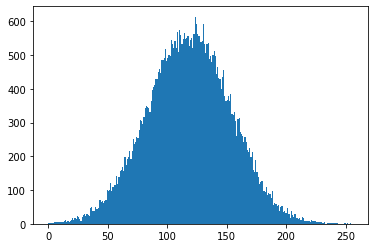

In [36]:
plt.hist(ref_image.ravel(), 256, [0, 256])
plt.show()

In [31]:
matched_img = match_histograms(img3_gray, ref_image)

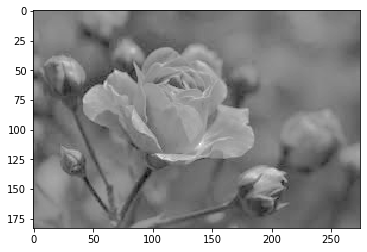

In [32]:
plt.imshow(matched_img, cmap='gray')

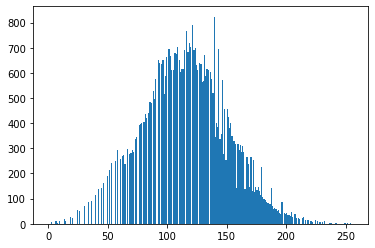

In [33]:
plt.hist(matched_img.ravel(), 256, [0, 256])
plt.show()

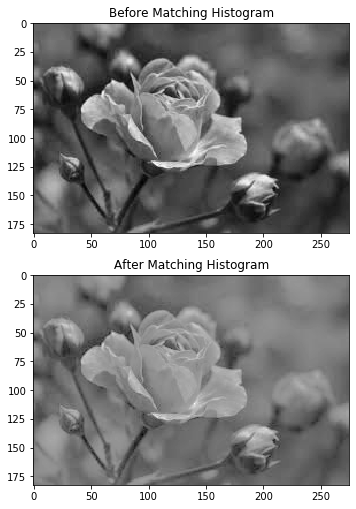

In [34]:
plt.figure(figsize=(8.5, 8.5))
plt.subplot(2, 1, 1)
plt.title('Before Matching Histogram')
plt.imshow(img3_gray, cmap='gray')

plt.subplot(2, 1, 2)
plt.title('After Matching Histogram')
plt.imshow(matched_img, cmap='gray')

plt.show()

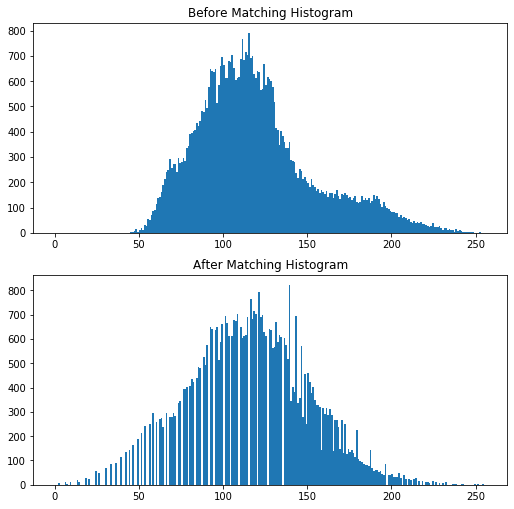

In [35]:
plt.figure(figsize=(8.5, 8.5))
plt.subplot(2, 1, 1)
plt.title('Before Matching Histogram')
plt.hist(img3_gray.ravel(), 256, [0, 256])

plt.subplot(2, 1, 2)
plt.title('After Matching Histogram')
plt.hist(matched_img.ravel(), 256, [0, 256])
plt.show()